In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import os
import os.path as osp

In [4]:
from ddf_utils.str import format_float_digits

In [5]:
for f in os.listdir('../../'):
    if 'datapoints' in f:
        print(f)

ddf--datapoints--deaths_rate_ages_15_29_years--by--country--year--cause--sex.csv
ddf--datapoints--deaths_rate_ages_45_59_years--by--country--year--cause--sex.csv
ddf--datapoints--deaths_rate_all_ages_alt--by--country--year--cause--sex.csv
ddf--datapoints--deaths_all_ages--by--country--year--cause--sex.csv
ddf--datapoints--deaths_rate_all_ages--by--country--year--cause--sex.csv
ddf--datapoints--deaths_rate_ages_60plus_years--by--country--year--cause--sex.csv
ddf--datapoints--deaths_rate_ages_0_14_years--by--country--year--cause--sex.csv
ddf--datapoints--deaths_rate_ages_30_44_years--by--country--year--cause--sex.csv


In [6]:
df = pd.read_csv('../../ddf--datapoints--deaths_rate_ages_15_29_years--by--country--year--cause--sex.csv')

In [8]:
df = df.set_index(['country', 'sex', 'cause'])

In [13]:
df.groupby(level=[0, 1, 2]).get_group((2045, 0, 'homicide'))

year  deaths_rate_ages_15_29_years
country sex cause                                       
2045    0   homicide  1969                       4.02453
            homicide  1990                       2.06386
            homicide  1991                       1.98742

In [ ]:
for f in os.listdir('../../'):
    if 'datapoints' in f:
        df = pd.read_csv(osp.join('../../', f))
        

In [12]:
# categories of homicide in ICD 10 
homicide = [f'X{x}' for x in range(85, 100)]

homicide2 = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05',
             'Y06', 'Y060', 'Y061', 'Y062', 'Y068', 'Y069',
             'Y07', 'Y070', 'Y071', 'Y072', 'Y073', 'Y078', 'Y079',
             'Y08', 'Y09', 'Y871'
            ]

for h in homicide2:
    homicide.append(h)

In [39]:
data = pd.read_csv("../source/Morticd10_part2.zip")

/Users/semio/.pyenv/versions/3.6.5/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
data.query("Country == '2450' and Cause in @homicide").groupby(['Country', 'Year'], as_index=True).sum()['Deaths1']

Country  Year
2450     2005    439
         2006    423
         2007    413
         2008    449
         2009    470
         2010    451
         2011    449
         2012    358
         2013    441
         2014    443
         2015    444
Name: Deaths1, dtype: int64

In [14]:
df = data.query("Country == '2450'")

In [16]:
df.columns

Index(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex', 'Frmat',
       'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5',
       'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11',
       'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17',
       'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23',
       'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Deaths4'],
      dtype='object')

In [17]:
import json

In [18]:
d7 = { "A138": "traffic"
    , "A148": "suicide"
    , "A149": "homicide"
    }

In [22]:
json.dump(d7, open('./icd7.json', 'w'), indent=2)

In [23]:
d8 = { "A138": "traffic"
    , "A147": "suicide"
    , "A148": "homicide"
    }

In [24]:
json.dump(d8, open('./icd8.json', 'w'), indent=2)

In [25]:
d9 = {"B471": "traffic"
      , "B472": "traffic"  # TODO: late effects from traffic is missing (E929.0). here using B529
      , "B529": "traffic"
     , "B54": "suicide"
     , "B55": "homicide"
     }

In [26]:
json.dump(d9, open('./icd9.json', 'w'), indent=2)

In [27]:
d10 = {}

# categories of suicide in ICD 10 
suicide = [f'X{x}' for x in range(60, 85)]
suicide.append("Y870")

# categories of homicide in ICD 10 
homicide = [f'X{x}' for x in range(85, 100)]

homicide2 = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 
             'Y060', 'Y061', 'Y062', 'Y068', 'Y069',
             'Y070', 'Y071', 'Y072', 'Y073', 'Y078', 'Y079',
             'Y08', 'Y09', 'Y871'
            ]

for h in homicide2:
    homicide.append(h)
    
    
for i in homicide:
    d10[i] = "homicide"
    
for i in suicide:
    d10[i] = "suicide"

In [28]:
# categories of traffic injures in ICD 10 

traffic = [
    "V011", "V019",
    "V021", "V029",
    "V031", "V039",
    "V041", "V049",
    "V061", "V069",
    "V092", "V093",
    
    "V103", "V104", "V105", "V109",
    "V113", "V114", "V115", "V119",
    "V123", "V124", "V125", "V129",
    "V133", "V134", "V135", "V139",
    "V143", "V144", "V145", "V149",
    "V154", "V155", "V159",
    "V164", "V165", "V169",
    "V174", "V175", "V179",
    "V184", "V185", "V189",
    "V194", "V195", "V196", "V198", "V199",
    
    "V203", "V204", "V205", "V209",
    "V213", "V214", "V215", "V219",
    "V223", "V224", "V225", "V229",
    "V233", "V234", "V235", "V239",
    "V243", "V244", "V245", "V249",
    "V253", "V254", "V255", "V259",
    "V263", "V264", "V265", "V269",
    "V273", "V274", "V275", "V279",
    "V283", "V284", "V285", "V289",
    "V294", "V295", "V296", "V298", "V299",
    
    "V304", "V305", "V306", "V307", "V309",
    "V314", "V315", "V316", "V317", "V319",
    "V324", "V325", "V326", "V327", "V329",
    "V334", "V335", "V336", "V337", "V339",
    "V344", "V345", "V346", "V347", "V349",
    "V354", "V355", "V356", "V357", "V359",
    "V364", "V365", "V366", "V367", "V369",
    "V374", "V375", "V376", "V377", "V379",
    "V384", "V385", "V386", "V387", "V389",
    "V394", "V395", "V396", "V398", "V399",
    
    "V404", "V405", "V406", "V407", "V409",
    "V414", "V415", "V416", "V417", "V419",
    "V424", "V425", "V426", "V427", "V429",
    "V434", "V435", "V436", "V437", "V439",
    "V444", "V445", "V446", "V447", "V449",
    "V454", "V455", "V456", "V457", "V459",
    "V464", "V465", "V466", "V467", "V469",
    "V474", "V475", "V476", "V477", "V479",
    "V484", "V485", "V486", "V487", "V489",
    "V494", "V495", "V496", "V498", "V499",
    
    "V504", "V505", "V506", "V507", "V509",
    "V514", "V515", "V516", "V517", "V519",
    "V524", "V525", "V526", "V527", "V529",
    "V534", "V535", "V536", "V537", "V539",
    "V544", "V545", "V546", "V547", "V549",
    "V554", "V555", "V556", "V557", "V559",
    "V564", "V565", "V566", "V567", "V569",
    "V574", "V575", "V576", "V577", "V579",
    "V584", "V585", "V586", "V587", "V589",
    "V594", "V595", "V596", "V598", "V599",
    
    "V604", "V605", "V606", "V607", "V609",
    "V614", "V615", "V616", "V617", "V619",
    "V624", "V625", "V626", "V627", "V629",
    "V634", "V635", "V636", "V637", "V639",
    "V644", "V645", "V646", "V647", "V649",
    "V654", "V655", "V656", "V657", "V659",
    "V664", "V665", "V666", "V667", "V669",
    "V674", "V675", "V676", "V677", "V679",
    "V684", "V685", "V686", "V687", "V689",
    "V694", "V695", "V696", "V698", "V699",
    
    "V704", "V705", "V706", "V707", "V709",
    "V714", "V715", "V716", "V717", "V719",
    "V724", "V725", "V726", "V727", "V729",
    "V734", "V735", "V736", "V737", "V739",
    "V744", "V745", "V746", "V747", "V749",
    "V754", "V755", "V756", "V757", "V759",
    "V764", "V765", "V766", "V767", "V769",
    "V774", "V775", "V776", "V777", "V779",
    "V784", "V785", "V786", "V787", "V789",
    "V794", "V795", "V796", "V798", "V799",
    
    "V803", "V804", "V805",
    "V811",
    "V821", "V828", "V829",
    "V830", "V831", "V832", "V833",
    "V840", "V841", "V842", "V843",
    "V850", "V851", "V852", "V853",
    "V860", "V861", "V862", "V863",
    "V870", "V871", "V872", "V873", "V874", "V875", "V876", "V877","V878", "V879",

    "V892", "V893",
    "V899",
    "V99",
    "Y850"
]

for i in traffic:
    d10[i] = "traffic"

In [29]:
json.dump(d10, open('./icd10.json', 'w'), indent=2)

In [31]:
df.columns

Index(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex', 'Frmat',
       'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5',
       'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11',
       'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17',
       'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23',
       'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Deaths4'],
      dtype='object')

In [33]:
df = df[['Country', 'Year', 'Cause', 'Sex', 'Deaths1']].copy()

In [40]:
df_ = df.groupby(['Country', 'Year', 'Cause'])['Deaths1'].sum()

In [42]:
df_.reset_index().to_csv('./tmp.csv', index=False)

In [48]:
print(data.Cause.unique().tolist())

['1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '1100', '1101', '1102', '1103', 'A05', 'A09', 'A15', 'A16', 'A18', 'A19', 'A35', 'A39', 'A41', 'AAA', 'B16', 'B19', 'B20', 'B21', 'B24', 'B50', 'B54', 'B99', 'C01', 'C02', 'C06', 'C07', 'C09', 'C10',

In [48]:
data.query("Country == '1125'").Cause.unique().tolist().index("X86")

1185

In [8]:
sg = "/Users/semio/src/work/Gapminder/datasets/open-numbers/ddf--gapminder--systema_globalis/"

In [94]:
data = pd.read_csv(osp.join(sg, "ddf--datapoints--suicide_total_deaths--by--geo--time.csv"))

In [22]:
import seaborn as sns

sns.set_context('poster')
sns.set_style('whitegrid')

In [24]:
data.geo.unique()

array(['abw', 'aia', 'alb', 'ant', 'arg', 'arm', 'atg', 'aus', 'aut',
       'aze', 'bel', 'bgr', 'bhr', 'bhs', 'bih', 'blr', 'blz', 'bmu',
       'bol', 'bra', 'brb', 'brn', 'can', 'che', 'cheslo', 'chl', 'col',
       'cpv', 'cri', 'cub', 'cym', 'cyp', 'cze', 'deu', 'deu_east',
       'deu_west', 'dma', 'dnk', 'dom', 'ecu', 'egy', 'esp', 'est', 'fin',
       'fji', 'flk', 'fra', 'gbr', 'geo', 'glp', 'grc', 'grd', 'gtm',
       'guf', 'guy', 'hkg', 'hnd', 'hrv', 'hti', 'hun', 'irl', 'irn',
       'irq', 'isl', 'isr', 'ita', 'jam', 'jor', 'jpn', 'kaz', 'kgz',
       'kir', 'kna', 'kor', 'kwt', 'lca', 'lka', 'ltu', 'lux', 'lva',
       'mac', 'mar', 'mco', 'mda', 'mdv', 'mex', 'mkd', 'mlt', 'mne',
       'mng', 'msr', 'mtq', 'mus', 'mys', 'myt', 'nic', 'nld', 'nor',
       'nzl', 'omn', 'pan', 'per', 'phl', 'png', 'pol', 'pri', 'prt',
       'pry', 'qat', 'reu', 'rou', 'rus', 'scg', 'sgp', 'slv', 'smr',
       'spm', 'srb', 'stp', 'sur', 'svk', 'svn', 'swe', 'syc', 'syr',
       'tca', 

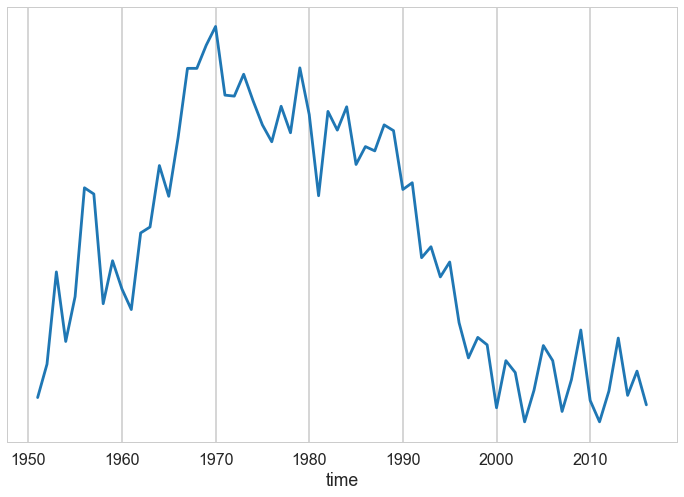

In [96]:
data[data.geo == 'swe'].set_index('time')['suicide_total_deaths'].plot(figsize=(12, 8), logy=True)

In [85]:
data[(data.geo == 'jpn') & (data.time > 1990)]

,geo,time,traffic_total_deaths
2502,jpn,1991,20711
2503,jpn,1992,22223
2504,jpn,1993,21798
2505,jpn,1994,22306
2506,jpn,1995,13977
2507,jpn,1996,13091
2508,jpn,1997,12808
2509,jpn,1998,12329
2510,jpn,1999,12022
2511,jpn,2000,11778


In [66]:
a = data[data.geo == 'twn'].set_index('time')['murder_total_deaths'].pct_change()

In [67]:
a[(abs(a)>1)]

Series([], Name: murder_total_deaths, dtype: float64)